## Check Password Strength Using ML algorithms

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rohit719/Password-Strength-Tester/master/data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [3]:
data.head() 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


#### Removing null values

In [4]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [5]:
data.dropna(inplace=True)

In [6]:
passwords_tuple=np.array(data)

In [7]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [8]:
import random
random.shuffle(passwords_tuple) #shuffling randomly for robustness


### extracting dependent features

In [9]:
y=[labels[1] for labels in passwords_tuple]

### extracting Independent features

In [10]:
X=[labels[0] for labels in passwords_tuple]

#### data visualization

In [11]:
import seaborn as sns

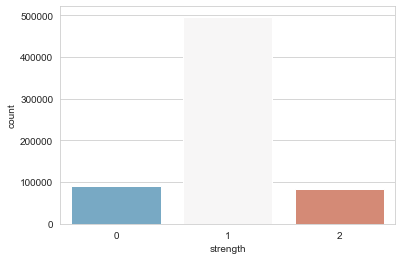

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

In [13]:
data.shape

(669639, 2)

#### creating tokenization function

In [14]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

#### APPLYING TF-IDF MODEL

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [16]:
X.shape

(669639, 140)

In [17]:
vectorizer.vocabulary_

{'k': 63,
 'z': 78,
 'd': 56,
 'e': 57,
 '5': 36,
 '7': 38,
 'i': 61,
 'n': 66,
 'o': 67,
 '3': 34,
 '4': 35,
 'v': 74,
 's': 71,
 '1': 32,
 'y': 77,
 'r': 70,
 'm': 65,
 'g': 59,
 '2': 33,
 'a': 53,
 'q': 69,
 'l': 64,
 'f': 58,
 't': 72,
 '6': 37,
 '9': 40,
 'u': 73,
 '0': 31,
 '8': 39,
 'c': 55,
 'h': 60,
 'w': 75,
 'j': 62,
 'p': 68,
 '-': 28,
 '@': 46,
 'b': 54,
 'x': 76,
 '>': 44,
 '.': 29,
 '&': 23,
 '?': 45,
 '<': 42,
 '!': 18,
 '_': 51,
 '±': 94,
 '%': 22,
 ';': 41,
 '(': 24,
 ')': 25,
 '^': 50,
 '#': 20,
 ' ': 17,
 '*': 26,
 '$': 21,
 '+': 27,
 '`': 52,
 'ô': 124,
 '/': 30,
 '{': 79,
 '}': 81,
 'ú': 129,
 '"': 19,
 '~': 82,
 '=': 43,
 'þ': 133,
 'ó': 123,
 '³': 96,
 '[': 47,
 '\\': 48,
 ']': 49,
 '\x19': 12,
 'ä': 111,
 '«': 91,
 '°': 93,
 '´': 97,
 'ð': 120,
 '\x1c': 14,
 '²': 95,
 '\x10': 7,
 '\x17': 11,
 '|': 80,
 'õ': 125,
 'å': 112,
 '‚': 137,
 'à': 107,
 '\x05': 2,
 '\x1b': 13,
 '÷': 127,
 'ß': 106,
 'ÿ': 134,
 '\x16': 10,
 'ò': 122,
 '·': 100,
 '\x1e': 16,
 '\x7f': 83,

In [18]:
X

<669639x140 sparse matrix of type '<class 'numpy.float64'>'
	with 5644514 stored elements in Compressed Sparse Row format>

In [19]:
data.iloc[0,0]

'kzde5577'

In [20]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.591622
5,0.567078
z,0.335557
k,0.292061
d,0.285525
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


In [21]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


In [24]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(log_class.score(X_test,y_test))

0.8122871990920495


In [26]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8200077653664656


In [40]:
X_predict=np.array(["%@846sdfg"])

In [41]:
X_predict

array(['%@846sdfg'], dtype='<U9')

In [27]:
X_predict=np.array(["%@846sdfg"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')

strong password


## Xgboost Algorithm

In [28]:
import xgboost as xgb

In [29]:
xgb_classifier=xgb.XGBClassifier()

In [30]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
xgb_classifier.score(X_test,y_test)

0.9863732751926408

In [32]:
X_predict=np.array(['@rtdryu123$'])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')

strong password


## MultinomialNB

In [33]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()

In [34]:
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
nb_classifier.score(X_test,y_test)

0.743825040320172

In [36]:
X_predict=np.array(['rtyu123$'])
X_predict=vectorizer.transform(X_predict)
y_pred=nb_classifier.predict(X_predict)
if y_pred == 0:
    print('weak password')
elif y_pred == 1:
    print('medium password')
else:
    print('strong password')


medium password


In [37]:
import pickle 

In [38]:
# open a file, where you ant to store the data
file = open('Xgboost Algorithm.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_classifier, file)

In [39]:
# open a file, where you ant to store the data
file = open('vectorizer.pkl', 'wb')

# dump information to that file
pickle.dump(vectorizer, file)

In [ ]:
# open a file, where you ant to store the data
file = open('vectorizer.pkl', 'wb')

# dump information to that file
pickle.dump(vectorizer, file)